### Task1 Prediction Using Supervised ML

### Problem Statement: Predict percentage of students based on number of Study hours using Linear regression

#### Importing Neceessary Libraries

In [5]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

#### Reading The Data

In [6]:
url='https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
data = pd.read_csv(url)

data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
data.dtypes

Hours     float64
Scores      int64
dtype: object

#### Descriptive Statistics Summary

In [7]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


The average score of approximately 51.48 suggests a moderate performance overall.

There is variability in both study hours and scores, as indicated by the standard deviations.

The majority of students (75%) studied for 7.4 hours or less, indicating that longer study durations are less common.

There's a wide range of scores achieved, from a minimum of 17 to a maximum of 95, indicating diverse academic performance among students.

The median study duration (4.8 hours) and median score (47) provide a central tendency measure, showing the typical values in the dataset.

Understanding these insights can help in identifying patterns, trends, or areas for improvement in studying habits and academic performance.

In [9]:
data.shape

(25, 2)

In [10]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

No missing values present in data

In [11]:
data.columns

Index(['Hours', 'Scores'], dtype='object')

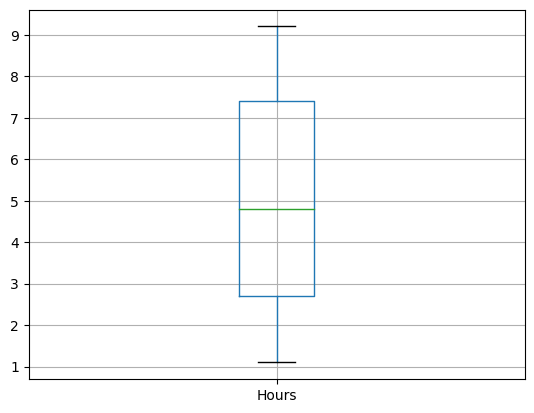

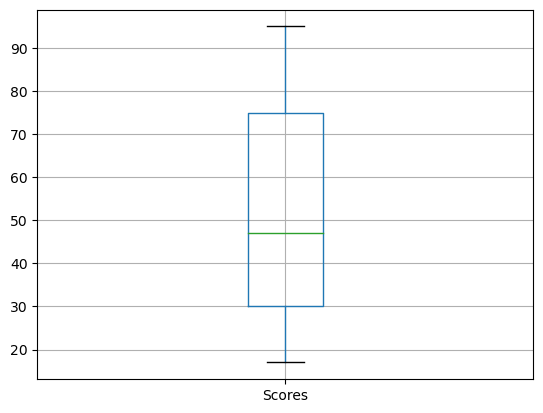

In [7]:
# Assumption 1: There should no outliers in data,check using boxplot.(graph gets affected due to one of variables range)

for i in data.columns:
    data.boxplot(column=i)
    plt.show()

No outliers are present in the data

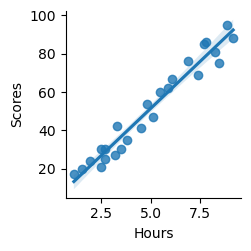

In [8]:
#Assumption2
# Assumption of linearity : Every ind var should have a linear relationship with the dep var.

sns.pairplot(data,x_vars=['Hours'],y_vars=['Scores'],kind='reg')
plt.show()

There is a linear relationship between Hours of study and scores

In [15]:
# create X and Y

X=data.loc[:,['Hours']]
Y=data.loc[:,'Scores']


In [10]:
print(X.shape)
print(Y.shape)

(25, 1)
(25,)


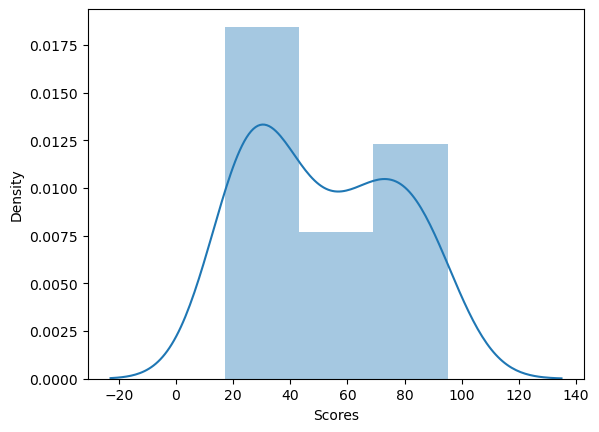

In [11]:
#assumption 3 on y var
# Assumption of normality: The dependent variable should follow an approximate normal distribution

sns.distplot(Y)
plt.show()

In [34]:
# Log transformation
import numpy as np
Y_log=np.log(Y)

#### Splitting the data using Train test split

In [35]:
from sklearn.model_selection import train_test_split
 
#Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_log, test_size=0.2, 
                                                    random_state=10)  

In [36]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(20, 1)
(5, 1)
(20,)
(5,)


#### Linear Regression

In [37]:
from sklearn.linear_model import LinearRegression

# create model object 
lm=LinearRegression()

# train model object
lm.fit(X_train,Y_train)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

2.771581420735658
[0.20633354]


In [38]:
# pair the feature names with the ccoefficients
print(list(zip(X.columns,lm.coef_)))

[('Hours', 0.20633353959049075)]


In [39]:
#predict using model

Y_pred=lm.predict(X_test)
print(Y_pred)


[3.08108173 3.82388247 3.4524821  3.43184875 3.70008235]


In [44]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred) 
print("R-squared:",r2)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)  
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.7919089205490142
Adj R-square: 0.7828614823120148


#### The values of R squared and adjusted R2 are close hence it is an ideal model

In [41]:
new_df=pd.DataFrame()
new_df=X_test.copy()  
 
new_df["Actual Scores"]=Y_test
new_df["Predicted Scores"]=Y_pred
new_df=new_df.reset_index().drop("index", axis=1)

In [42]:
new_df

,Hours,Actual Scores,Predicted Scores
0,1.5,2.995732,3.081082
1,5.1,3.850148,3.823882
2,3.3,3.737670,3.452482
3,3.2,3.295837,3.431849
4,4.5,3.713572,3.700082


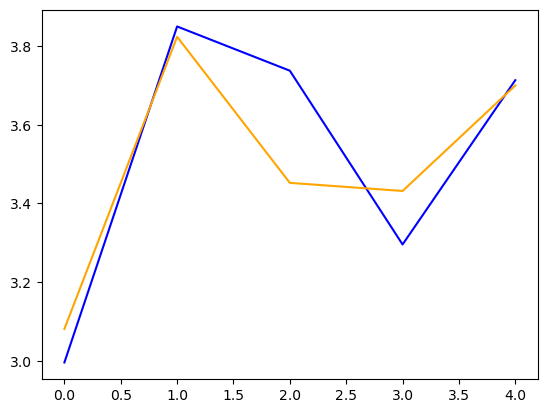

In [43]:
new_df['Actual Scores'].plot(color='blue')
new_df['Predicted Scores'].plot(color='orange')
plt.show()